<a href="https://colab.research.google.com/github/donmarcolaureano/predictionofproductsales/blob/main/PredictionOfProductSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Prediction of Product Sales
-Marco Laureano


## Project Overview
- The purpose of this project is to project the product sales for food items sold at various stores.
- The goal is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales

## Load and Inspect Data

In [184]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [185]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
# import data
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df_sales_predictions = pd.read_csv(fname)

In [187]:
df_sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [188]:
# Check info
df_sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [189]:
# How many rows and columns
rows = len(df_sales_predictions.axes[0])
cols = len(df_sales_predictions.axes[1])
print('Number of Rows: ', rows)
print('Number of Columns', cols)

Number of Rows:  8523
Number of Columns 12


In [190]:
# what are the data types of each variable
df_sales_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [191]:
# Are there duplicates? If so, drop dupes
# Create duplicate filter
duplicated_rows = df_sales_predictions.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [192]:
# Count dupes
df_sales_predictions.duplicated().sum()

0

In [193]:
# Identify missing values
df_sales_predictions.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [194]:
# Total number of null values (true) for each column
null_sums = df_sales_predictions.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [195]:
# Percent of null values
null_percent = null_sums/len(df_sales_predictions) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [196]:
# view only colums with null values
null_percent[null_percent>0]

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64

In [197]:
#Fill null values with -1
df_sales_predictions["Outlet_Size"] = df_sales_predictions['Outlet_Size'].fillna(-1)
df_sales_predictions["Outlet_Size"].isna().sum()


0

In [198]:
# fill null values with -1
df_sales_predictions['Item_Weight'] = df_sales_predictions['Item_Weight'].fillna(-1)
df_sales_predictions['Item_Weight'].isna().sum()

0

### Address missing values by using a placeholder value

In [199]:
# Saving list of column names for object columns
cat_cols = df_sales_predictions.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [200]:
# Apply placeholder
df_sales_predictions[cat_cols] = df_sales_predictions[cat_cols].fillna('MISSING')

In [201]:
# Confirm that there are no missing values after addressing them
df_sales_predictions[cat_cols].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

### Find and fix inconsistent categories of data

In [202]:
# Identify string columns
string_cols = df_sales_predictions.select_dtypes('object').columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [203]:
# Obtain values counts for all string columns
for col in string_cols:
  print(f'Value Counts for {col}')
  print(df_sales_predictions[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [204]:
# Check unique values and counts of Item_Fat_Content column
df_sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [205]:
#Standardize the values
df_sales_predictions['Item_Fat_Content'] = df_sales_predictions['Item_Fat_Content'].replace({'LF':'Low Fat', 'LF':'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'})
df_sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Obtain summary statistics for numerical columns
- The numerical columns in this data set are: Outlet Establishment Year

In [206]:
# Outlet Establishment Min
df_sales_predictions['Outlet_Establishment_Year'].min()


1985

In [207]:
# Outlet Establishment Max
df_sales_predictions['Outlet_Establishment_Year'].max()


2009

In [208]:
# Outlet Establishment Mean
df_sales_predictions['Outlet_Establishment_Year'].mean().round(2)

1997.83

## Exploratory Data Analysis

In [209]:
df_sales_predictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


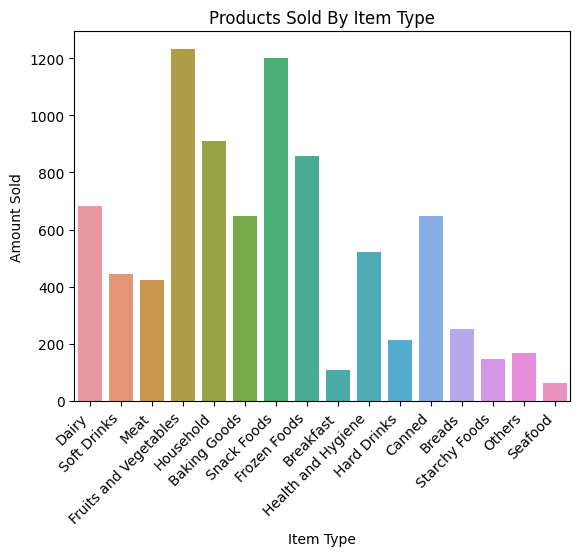

In [210]:
# Countplot of items
ax = sns.countplot(data=df_sales_predictions, x='Item_Type')
ax.set_title('Products Sold By Item Type')
ax.set_xlabel('Item Type')
ax.set_ylabel('Amount Sold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

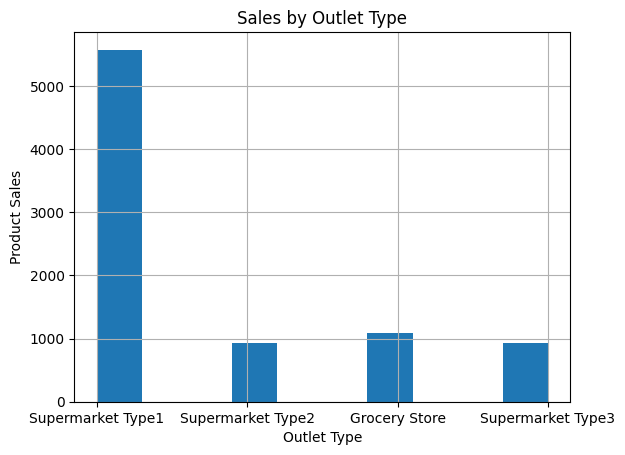

In [211]:
# histogram for Outlet type
ax = df_sales_predictions['Outlet_Type'].hist()
ax.set_title('Sales by Outlet Type')
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Product Sales');

In [223]:
# heatmap correlations
corr = df_sales_predictions.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


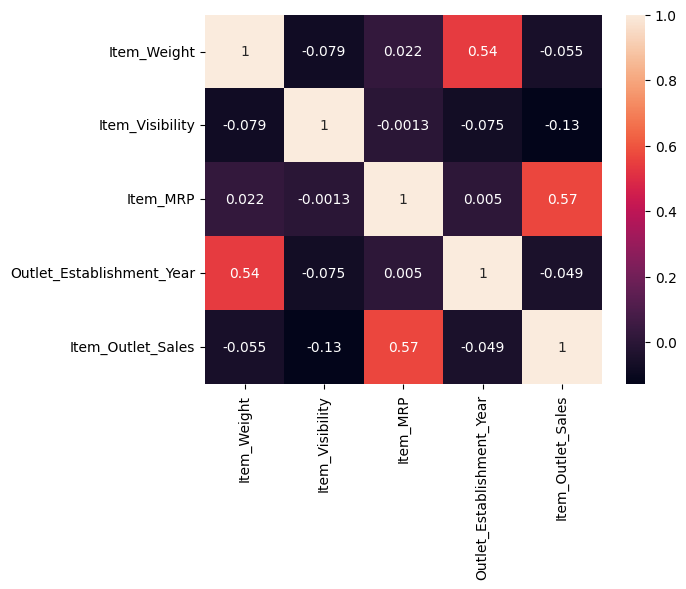

In [224]:
#heatmap
sns.heatmap(corr, annot = True);

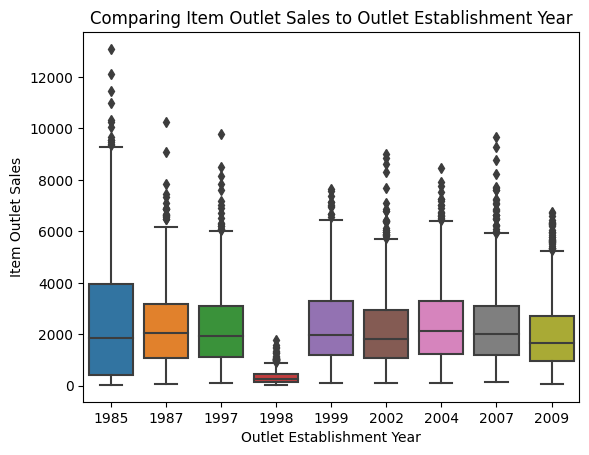

In [228]:
# boxplot
ax = sns.boxplot(data=df_sales_predictions, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
ax.set_title('Comparing Item Outlet Sales to Outlet Establishment Year')
ax.set_xlabel('Outlet Establishment Year')
ax.set_ylabel('Item Outlet Sales');

## Feature Inspection